# https://www.kaggle.com/datasets/pooriamst/occupancy-detection

In [1]:
import polars as pl
import polars.selectors as cs
import seaborn as sns
import plotly.express as px
import altair as alt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import great_tables as tg
import datetime as dt

In [2]:
df_path = r"F:\Datasets\Machine Learning\occupancy_detection.csv"

In [3]:
df = pl.read_csv(df_path, infer_schema=True)

In [4]:
df

id,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
i64,str,f64,f64,f64,f64,f64,i64
140,"""02/02/15 14:19""",23.7,26.272,585.2,749.2,0.004764,1
141,"""02/02/15 14:19""",23.718,26.29,578.4,760.4,0.004773,1
142,"""02/02/15 14:21""",23.73,26.23,572.666667,769.666667,0.004765,1
143,"""02/02/15 14:22""",23.7225,26.125,493.75,774.75,0.004744,1
144,"""02/02/15 14:23""",23.754,26.2,488.6,779.0,0.004767,1
…,…,…,…,…,…,…,…
2800,"""02/04/15 10:38""",24.29,25.7,808.0,1150.25,0.004829,1
2801,"""02/04/15 10:40""",24.33,25.736,809.8,1129.2,0.004848,1
2802,"""02/04/15 10:40""",24.33,25.7,817.0,1125.8,0.004841,1


In [5]:
df = df.with_columns(
    pl.col('date').str.strptime(pl.Datetime, "%m/%d/%y %H:%M")
)

In [6]:
split_date = df.select(
    pl.col('date').dt.year().alias('year'),
    pl.col('date').dt.month().alias('month'),
    pl.col('date').dt.day().alias('day'),
    pl.col('date').dt.hour().alias('hour'),
    pl.col('date').dt.minute().alias('minute'),
)

df.insert_column(2, split_date['year'])
df.insert_column(3, split_date['month'])
df.insert_column(4, split_date['day'])
df.insert_column(5, split_date['hour'])
df.insert_column(6, split_date['minute'])

id,date,year,month,day,hour,minute,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
i64,datetime[μs],i32,i8,i8,i8,i8,f64,f64,f64,f64,f64,i64
140,2015-02-02 14:19:00,2015,2,2,14,19,23.7,26.272,585.2,749.2,0.004764,1
141,2015-02-02 14:19:00,2015,2,2,14,19,23.718,26.29,578.4,760.4,0.004773,1
142,2015-02-02 14:21:00,2015,2,2,14,21,23.73,26.23,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,2015,2,2,14,22,23.7225,26.125,493.75,774.75,0.004744,1
144,2015-02-02 14:23:00,2015,2,2,14,23,23.754,26.2,488.6,779.0,0.004767,1
…,…,…,…,…,…,…,…,…,…,…,…,…
2800,2015-02-04 10:38:00,2015,2,4,10,38,24.29,25.7,808.0,1150.25,0.004829,1
2801,2015-02-04 10:40:00,2015,2,4,10,40,24.33,25.736,809.8,1129.2,0.004848,1
2802,2015-02-04 10:40:00,2015,2,4,10,40,24.33,25.7,817.0,1125.8,0.004841,1


In [7]:
df = df.drop('id', 'date')

In [8]:
X = df.select(cs.exclude('Occupancy'))
y = df.get_column('Occupancy')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)

In [14]:
scaled_X_train = pl.DataFrame(scaled_X_train, schema=X_train.columns)

In [15]:
scaled_X_test = scaler.transform(X_test)

In [16]:
scaled_X_test = pl.DataFrame(scaled_X_test, schema=X_test.columns)

[]

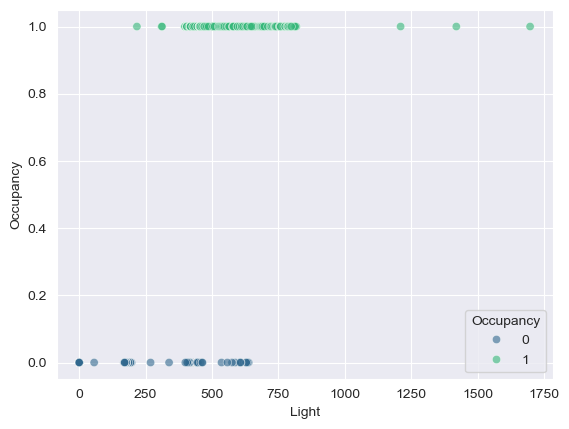

In [17]:
sns.scatterplot(
    x=df['Light'],
    y=df['Occupancy'],
    hue=df['Occupancy'],
    palette="viridis",
    alpha=0.6,
)

plt.plot()

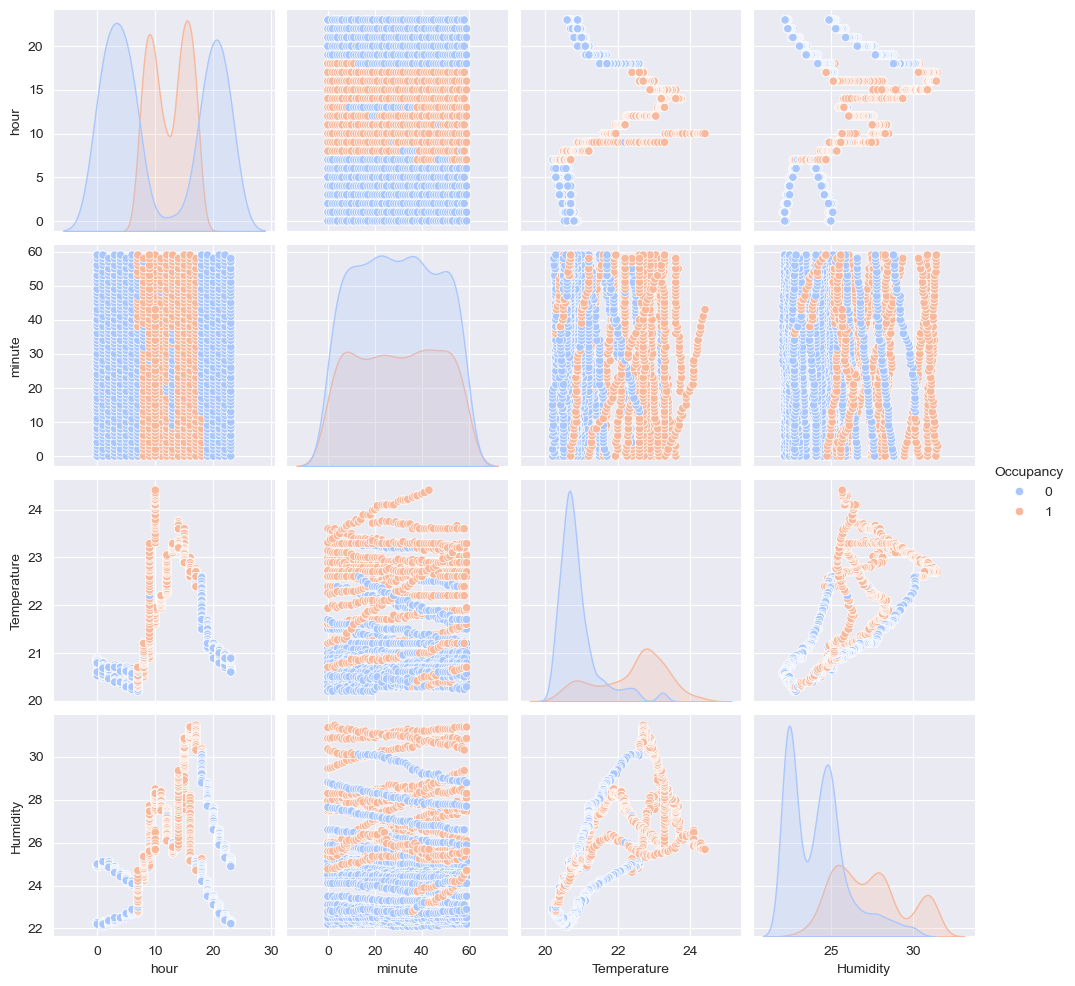

In [18]:
sns.pairplot(
    df.to_pandas(),
    hue="Occupancy",
    vars=["hour", "minute", "Temperature", "Humidity"],
    palette="coolwarm",
    diag_kind="kde"
)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logistic_model = LogisticRegression()

In [22]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50,75, 100],
    'solver': ['liblinear', 'saga'],
}

In [23]:
logistic_model_cv = GridSearchCV(
    logistic_model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [24]:
logistic_model_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50, 75, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [25]:
predictions = logistic_model_cv.predict(scaled_X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [27]:
accuracy_score(y_test, predictions)

0.9820089955022488

In [28]:
confusion_matrix(y_test, predictions)

array([[421,  12],
       [  0, 234]])

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       433
           1       0.95      1.00      0.97       234

    accuracy                           0.98       667
   macro avg       0.98      0.99      0.98       667
weighted avg       0.98      0.98      0.98       667



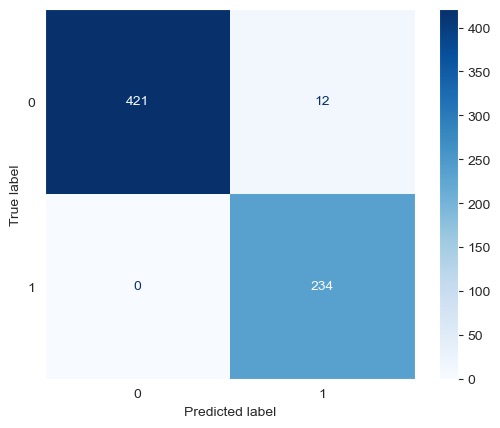

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

In [31]:
models_accuracy = pl.DataFrame({
    'Model': ['Logistic Regression 0', 'Logistic Regression 1'],
    'Accuracy': [accuracy_score(y_test, predictions) * 100, 0],
    '0': confusion_matrix(y_test, predictions)[:, 0],
    '1': confusion_matrix(y_test, predictions)[:, 1],
})
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234


In [32]:
from sklearn.linear_model import RidgeClassifier

In [33]:
ridge_classifier = RidgeClassifier()

In [34]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50, 75, 100],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'class_weight': ['balanced', None],
}

In [35]:
ridge_classifier_cv = GridSearchCV(
    estimator=ridge_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [36]:
ridge_classifier_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50, 75,
                                   100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [37]:
predictions = ridge_classifier_cv.predict(scaled_X_test)

In [38]:
ridge_classifier_cv.best_params_

{'alpha': 0.001, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'svd'}

In [39]:
accuracy_score(y_test, predictions)

0.9820089955022488

In [40]:
confusion_matrix(y_test, predictions)

array([[421,  12],
       [  0, 234]])

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       433
           1       0.95      1.00      0.97       234

    accuracy                           0.98       667
   macro avg       0.98      0.99      0.98       667
weighted avg       0.98      0.98      0.98       667



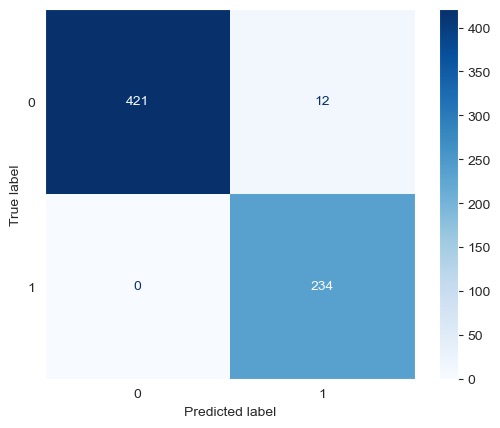

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

In [43]:
ridge_classifier = pl.DataFrame({
    'Model': ['Ridge Classifier 0', 'Ridge Classifier 1'],
    'Accuracy': [accuracy_score(y_test, predictions) * 100, 0],
    '0': confusion_matrix(y_test, predictions)[:, 0],
    '1': confusion_matrix(y_test, predictions)[:, 1],
})

In [44]:
models_accuracy = pl.concat([models_accuracy, ridge_classifier], how='vertical')
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234


In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()

In [47]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 25, 10, 50, 75, 100], # 75
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # poly
    'degree': [2, 3, 4, 5], # 5
    'gamma': ['scale', 'auto'], # scale
    'class_weight': ['balanced', None], # None
    'probability': [True, False], # True
    'max_iter': [-1],
}

In [48]:
svc_cv = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [49]:
svc_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 25, 10, 50, 75, 100],
                         'class_weight': ['balanced', None],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1], 'probability': [True, False]},
             scoring='accuracy', verbose=1)

In [50]:
predictions = svc_cv.predict(scaled_X_test)

In [51]:
svc_cv.best_params_

{'C': 75,
 'class_weight': None,
 'degree': 5,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': True}

In [52]:
accuracy_score(y_test, predictions)

0.9910044977511244

In [53]:
confusion_matrix(y_test, predictions)

array([[429,   4],
       [  2, 232]])

In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       433
           1       0.98      0.99      0.99       234

    accuracy                           0.99       667
   macro avg       0.99      0.99      0.99       667
weighted avg       0.99      0.99      0.99       667



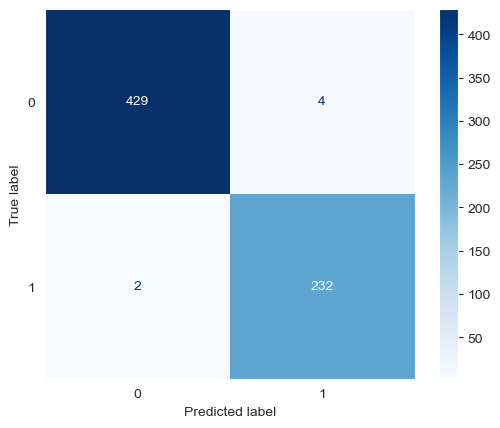

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues').ax_.grid(False)

In [56]:
svc_accuracy = pl.DataFrame({
    'Model': ['SVC 0', 'SVC 1'],
    'Accuracy': [accuracy_score(y_test, predictions) * 100, 0],
    '0': confusion_matrix(y_test, predictions)[:, 0],
    '1': confusion_matrix(y_test, predictions)[:, 1],
})

In [57]:
models_accuracy = pl.concat([models_accuracy, svc_accuracy], how='vertical')

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
random_forest_classifier = RandomForestClassifier()

In [60]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'class_weight': ['balanced', None],
    'max_features': [None, 'sqrt', 'log2'],
}

In [61]:
random_forest_classifier_cv = (
    GridSearchCV(
        estimator=random_forest_classifier,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1,
    )
)

In [62]:
random_forest_classifier_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [63]:
random_forest_classifier_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'n_estimators': 60}

In [64]:
predictions = random_forest_classifier_cv.predict(scaled_X_test)

In [65]:
accuracy_score(predictions, y_test)

0.9910044977511244

In [66]:
confusion_matrix(predictions, y_test)

array([[428,   1],
       [  5, 233]])

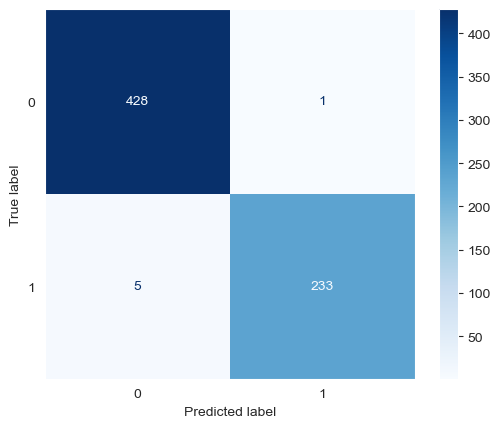

In [67]:
ConfusionMatrixDisplay.from_predictions(predictions, y_test, cmap='Blues').ax_.grid(False)

In [68]:
random_forest_accuracy = pl.DataFrame({
    'Model': ['Random Forest Classifier 0', 'Random Forest Classifier 1'],
    'Accuracy': [accuracy_score(y_test, predictions) * 100, 0],
    '0': confusion_matrix(y_test, predictions)[:, 0],
    '1': confusion_matrix(y_test, predictions)[:, 1],
})

random_forest_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Random Forest Classifier 0""",99.10045,428,5
"""Random Forest Classifier 1""",0.0,1,233


In [69]:
models_accuracy = pl.concat([models_accuracy, random_forest_accuracy], how='vertical')

In [70]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
"""SVC 1""",0.0,2,232
"""Random Forest Classifier 0""",99.10045,428,5
"""Random Forest Classifier 1""",0.0,1,233


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
decision_tree_classifier = DecisionTreeClassifier()

In [73]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
}

In [74]:
decision_tree_classifier_cv = (
    GridSearchCV(
        estimator=decision_tree_classifier,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1,
    )
)

In [75]:
decision_tree_classifier_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [76]:
decision_tree_classifier_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'splitter': 'best'}

In [77]:
predictions = decision_tree_classifier_cv.predict(scaled_X_test)

In [78]:
accuracy_score(predictions, y_test)

0.9835082458770614

In [79]:
confusion_matrix(predictions, y_test)

array([[428,   6],
       [  5, 228]])

In [80]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       434
           1       0.97      0.98      0.98       233

    accuracy                           0.98       667
   macro avg       0.98      0.98      0.98       667
weighted avg       0.98      0.98      0.98       667



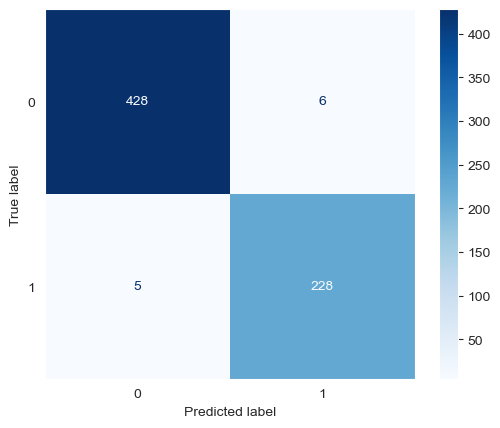

In [81]:
ConfusionMatrixDisplay.from_predictions(predictions, y_test, cmap='Blues').ax_.grid(False)

In [82]:
decision_tree_accuracy = pl.DataFrame({
    'Model': ['Decision Tree Classifier 0', 'Decision Tree Classifier 1'],
    'Accuracy': [accuracy_score(y_test, predictions) * 100, 0],
    '0': confusion_matrix(y_test, predictions)[:, 0],
    '1': confusion_matrix(y_test, predictions)[:, 1],
})

In [83]:
models_accuracy = pl.concat([models_accuracy, decision_tree_accuracy], how='vertical')

In [84]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
"""SVC 1""",0.0,2,232
"""Random Forest Classifier 0""",99.10045,428,5
"""Random Forest Classifier 1""",0.0,1,233
"""Decision Tree Classifier 0""",98.350825,428,5


In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gradient_boosting = GradientBoostingClassifier()

In [87]:
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50, 75, 100],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'criterion': ['friedman_mse', 'squared_error'],
}

In [88]:
gradient_boosting_cv = GridSearchCV(
    estimator=gradient_boosting,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [89]:
gradient_boosting_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50,
                                           75, 100],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [90]:
gradient_boosting_cv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'n_estimators': 90}

In [91]:
predictions = gradient_boosting_cv.predict(scaled_X_test)

In [92]:
accuracy_score(predictions, y_test)

0.9895052473763118

In [93]:
confusion_matrix(predictions, y_test)

array([[427,   1],
       [  6, 233]])

In [94]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       428
           1       1.00      0.97      0.99       239

    accuracy                           0.99       667
   macro avg       0.99      0.99      0.99       667
weighted avg       0.99      0.99      0.99       667



In [95]:
gradient_boosting = pl.DataFrame({
    'Model': ['Gradient Boosting Classifier 0', 'Gradient Boosting Classifier 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [96]:
models_accuracy = pl.concat([models_accuracy, gradient_boosting], how='vertical')

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
ada_boosting = AdaBoostClassifier()

In [99]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50, 75, 100],
    'algorithm': ['SAMME'],
}

In [100]:
ada_boosting_cv = GridSearchCV(
    estimator=ada_boosting,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [101]:
ada_boosting_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.001, 0.01, 0.1, 0.5, 1, 10, 25, 50,
                                           75, 100],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [102]:
predictions = ada_boosting_cv.predict(X_test)

In [103]:
accuracy_score(predictions, y_test)

0.9730134932533733

In [104]:
confusion_matrix(predictions, y_test)

array([[415,   0],
       [ 18, 234]])

In [105]:
ada_boost_accuracy = pl.DataFrame({
    'Model': ['Ada Boost Classifier 0', 'Ada Boost Classifier 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [106]:
models_accuracy = pl.concat([models_accuracy, ada_boost_accuracy], how='vertical')

In [107]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
…,…,…,…
"""Decision Tree Classifier 1""",0.0,6,228
"""Gradient Boosting Classifier 0""",98.950525,427,1
"""Gradient Boosting Classifier 1""",0.0,6,233


In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier()

In [110]:
param_grid = {
  'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
   'weights': [None, 'distance'],
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50, 60, 70, 80, 90, 100],
    'p': [1, 2],
}

In [111]:
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [112]:
knn_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50, 60, 70, 80, 90, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': [None, 'distance']},
             scoring='accuracy', verbose=1)

In [113]:
predictions = knn_cv.predict(scaled_X_test)

In [114]:
accuracy_score(predictions, y_test)

0.9940029985007496

In [115]:
confusion_matrix(predictions, y_test)

array([[429,   0],
       [  4, 234]])

In [116]:
knn_cv_accuracy = pl.DataFrame({
    'Model': ['K Nearest Neighbors 0', 'K Nearest Neighbors 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [117]:
models_accuracy = pl.concat([models_accuracy, knn_cv_accuracy], how='vertical')

In [118]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
…,…,…,…
"""Gradient Boosting Classifier 1""",0.0,6,233
"""Ada Boost Classifier 0""",97.301349,415,0
"""Ada Boost Classifier 1""",0.0,18,234


In [119]:
from sklearn.neural_network import MLPClassifier

In [120]:
mlpclassifier = MLPClassifier()

In [121]:
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['adaptive'],
    'max_iter': [200, 300, 500],
}


In [122]:
mlpclassifier_cv = GridSearchCV(
    estimator=mlpclassifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [123]:
mlpclassifier_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'learning_rate': ['adaptive'],
                         'max_iter': [200, 300, 500], 'solver': ['adam']},
             scoring='accuracy', verbose=1)

In [124]:
predictions = mlpclassifier_cv.predict(X_test)

In [125]:
mlpclassifier_cv.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 500,
 'solver': 'adam'}

In [126]:
accuracy_score(predictions, y_test)

0.8845577211394303

In [127]:
confusion_matrix(predictions, y_test)

array([[423,  67],
       [ 10, 167]])

In [128]:
mlpclassifier_accuracy = pl.DataFrame({
    'Model': ['MLP Classifier 0', 'MLP Classifier 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [129]:
models_accuracy = pl.concat([models_accuracy, mlpclassifier_accuracy], how='vertical')

In [130]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
…,…,…,…
"""Ada Boost Classifier 1""",0.0,18,234
"""K Nearest Neighbors 0""",99.4003,429,0
"""K Nearest Neighbors 1""",0.0,4,234


In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [132]:
linear_discriminant = LinearDiscriminantAnalysis()

In [133]:
param_grid = {
    'priors': [None, [0.5, 0.5]],
    'shrinkage': [None, 'auto', 0.1, 0.2, 0.5],
    'solver': ['lsqr', 'eigen'],
    'store_covariance': [True, False],
    'tol': [0.0001, 0.001, 0.01, 0.1]
}

In [134]:
linear_discriminant_cv = GridSearchCV(
    estimator=linear_discriminant,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [135]:
linear_discriminant_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Zygim\anaconda3\envs

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'priors': [None, [0.5, 0.5]],
                         'shrinkage': [None, 'auto', 0.1, 0.2, 0.5],
                         'solver': ['lsqr', 'eigen'],
                         'store_covariance': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

In [136]:
predictions = linear_discriminant_cv.predict(scaled_X_test)

In [137]:
accuracy_score(predictions, y_test)

0.9820089955022488

In [138]:
confusion_matrix(predictions, y_test)

array([[421,   0],
       [ 12, 234]])

In [139]:
linear_discriminant_accuracy = pl.DataFrame({
    'Model': ['Linear Discriminant Analysis 0', 'Linear Discriminant Analysis 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [140]:
models_accuracy = pl.concat([models_accuracy, linear_discriminant_accuracy], how='vertical')

In [141]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
…,…,…,…
"""K Nearest Neighbors 1""",0.0,4,234
"""MLP Classifier 0""",88.455772,423,67
"""MLP Classifier 1""",0.0,10,167


In [142]:
from sklearn.ensemble import ExtraTreesClassifier

In [143]:
extra_trees = ExtraTreesClassifier()

In [144]:
param_grid = {
  'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'max_features': [None, 'sqrt', 'log2'],
  'class_weight': ['balanced', None],
}

In [145]:
extra_trees_cv = GridSearchCV(
    estimator=extra_trees,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [146]:
extra_trees_cv.fit(scaled_X_test, y_test)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=1)

In [147]:
predictions = extra_trees_cv.predict(scaled_X_test)

In [148]:
extra_trees_cv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 10}

In [149]:
accuracy_score(predictions, y_test)

0.9985007496251874

In [150]:
confusion_matrix(predictions, y_test)

array([[432,   0],
       [  1, 234]])

In [151]:
extra_trees_accuracy = pl.DataFrame({
    'Model': ['Extra Trees Classifier 0', 'Extra Trees Classifier 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [152]:
models_accuracy = pl.concat([models_accuracy, extra_trees_accuracy], how='vertical')

In [153]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
…,…,…,…
"""MLP Classifier 1""",0.0,10,167
"""Linear Discriminant Analysis 0""",98.2009,421,0
"""Linear Discriminant Analysis 1""",0.0,12,234


In [154]:
from sklearn.ensemble import VotingClassifier

In [155]:
voting_classifier = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('random_forest', random_forest_classifier),
        ('decision_tree', decision_tree_classifier),
    ]
)

In [156]:
param_grid = {
    # SVC hyperparameters
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],

    # Random Forest hyperparameters
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__class_weight': ['balanced', None],

    # Decision Tree hyperparameters
    'decision_tree__criterion': ['gini', 'entropy'],
    'decision_tree__max_depth': [None, 5, 10],
    'decision_tree__splitter': ['best', 'random'],

    # Voting strategy
    'voting': ['soft', 'hard'],  # Optimize whether to use soft or hard voting
}

In [157]:
voting_classifier_cv = GridSearchCV(
    estimator=voting_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
)

In [158]:
voting_classifier_cv.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


C:\Users\Zygim\anaconda3\envs\Analytics__2024_12_29\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan 0.98698496        nan ... 0.98397995        nan 0.98848496]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('svc', SVC()),
                                                    ('random_forest',
                                                     RandomForestClassifier()),
                                                    ('decision_tree',
                                                     DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [None, 5, 10],
                         'decision_tree__splitter': ['best', 'random'],
                         'random_forest__class_weight': ['balanced', None],
                         'random_forest__max_depth': [None, 10, 20],
                         'random_forest__n_estimators': [50, 100, 200],
                         'svc__C': [0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf'],
                         'voting': ['soft', 'hard']},
             scoring='accuracy', verbose=1)

In [159]:
predictions = voting_classifier_cv.predict(scaled_X_test)

In [160]:
voting_classifier_cv.best_params_

{'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': 10,
 'decision_tree__splitter': 'random',
 'random_forest__class_weight': 'balanced',
 'random_forest__max_depth': 10,
 'random_forest__n_estimators': 50,
 'svc__C': 10,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'voting': 'hard'}

In [161]:
accuracy_score(predictions, y_test)

0.9865067466266867

In [162]:
confusion_matrix(predictions, y_test)

array([[425,   1],
       [  8, 233]])

In [164]:
voting_classifier_accuracy = pl.DataFrame({
    'Model': ['Voting Classifier 0', 'Voting Classifier 1'],
    'Accuracy': [accuracy_score(predictions, y_test) * 100, 0],
    '0': confusion_matrix(predictions, y_test)[:, 0],
    '1': confusion_matrix(predictions, y_test)[:, 1],
})

In [165]:
models_accuracy = pl.concat([models_accuracy, voting_classifier_accuracy], how='vertical')

In [166]:
models_accuracy

Model,Accuracy,0,1
str,f64,i64,i64
"""Logistic Regression 0""",98.2009,421,12
"""Logistic Regression 1""",0.0,0,234
"""Ridge Classifier 0""",98.2009,421,12
"""Ridge Classifier 1""",0.0,0,234
"""SVC 0""",99.10045,429,4
…,…,…,…
"""Linear Discriminant Analysis 1""",0.0,12,234
"""Extra Trees Classifier 0""",99.850075,432,0
"""Extra Trees Classifier 1""",0.0,1,234


In [176]:
import joblib

In [177]:
scaler_file = 'scaler.pkl'
model_file = 'extra_trees_cv.joblib'

In [178]:
scaler = joblib.load(scaler_file)
loaded_model = joblib.load(model_file)

In [179]:
scaled_X_test = scaler.transform(X_test)

In [186]:
scaled_X_test = pl.DataFrame(scaled_X_test, schema=X_test.columns)

In [187]:
test_predictions = loaded_model.predict(scaled_X_test[:10])
test_predictions

[1 1 0 1 0 0 0 0 0 1]


In [188]:
test_predictions

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1])